In [21]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
warnings.filterwarnings('ignore')
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

(x_train, y_train), (x_test, y_test) = mnist.load_data()
X_train = x_train / 255.
X_test = x_test / 255.

In [2]:
#Build Autoencoder

encoder = Sequential()
encoder.add(Conv2D(1, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)))
encoder.add(MaxPooling2D(pool_size=(2, 2)))
encoder.add(Conv2D(2, kernel_size=(3, 3), padding="same", activation="relu"))
encoder.add(MaxPooling2D(pool_size=(2, 2)))


decoder = Sequential()
decoder.add(Conv2D(4, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(7, 7, 2)))
decoder.add(UpSampling2D(size=(2, 2)))
decoder.add(Conv2D(2, kernel_size=(3, 3), padding="same", activation="relu"))
decoder.add(UpSampling2D(size=(2, 2)))
decoder.add(Conv2D(1, kernel_size=(3, 3), padding="same", activation="sigmoid"))

model = Sequential()
model.add(encoder)
model.add(decoder)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [3]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 7, 7, 2)           30        
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28, 1)         169       
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

In [6]:
model.fit(
    X_train.reshape(-1, 28, 28, 1), 
    X_train.reshape(-1, 28, 28, 1), 
    batch_size=64, 
    epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0795 - acc: 0.7984
Epoch 2/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0192 - acc: 0.8089s - loss -
Epoch 3/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0161 - acc: 0.8108
Epoch 4/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0134 - acc: 0.8122
Epoch 5/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0123 - acc: 0.8126


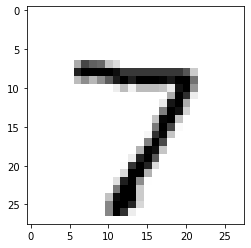

In [9]:
plt.imshow(X_test[0],cmap='gray_r')
plt.show()

In [10]:
X_test[0].shape

(28, 28)

In [11]:
28 * 28

784

In [12]:
encoded = encoder.predict(X_test[0].reshape(-1, 28, 28, 1))

In [13]:
encoded.shape

(1, 7, 7, 2)

In [14]:
7 * 7 * 2

98

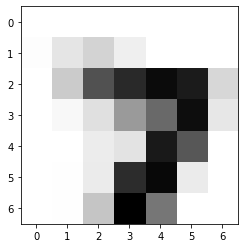

In [15]:
plt.imshow(encoded[0, :, :, 0],cmap="gray_r")
plt.show()

In [16]:
decoded = decoder.predict(encoded)

In [17]:
decoded.shape

(1, 28, 28, 1)

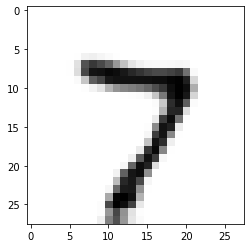

In [18]:
plt.imshow(decoded.reshape(28, 28),cmap="gray_r")
plt.show()

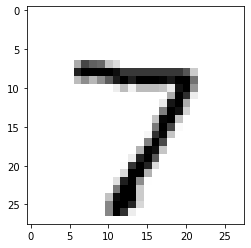

In [19]:
plt.imshow(X_test[0],cmap="gray_r")
plt.show()

## Bildrauschen

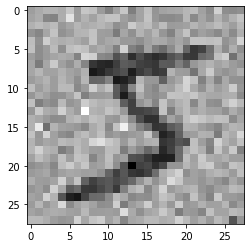

In [22]:
plt.imshow(X_train[0], cmap="gray_r")
plt.imshow(X_train[0] + np.random.normal(0, 0.2, (28, 28)), cmap="gray_r")

In [23]:
Xnoise_train = X_train + np.random.normal(0, 0.2, (60000, 28, 28))
Xnoise_test = X_test + np.random.normal(0, 0.2, (10000, 28, 28))
model.fit(Xnoise_train.reshape(-1, 28, 28, 1), X_train.reshape(-1, 28, 28, 1), epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0145 - acc: 0.8118
Epoch 2/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0141 - acc: 0.8120
Epoch 3/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0139 - acc: 0.8121
Epoch 4/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0137 - acc: 0.8122
Epoch 5/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0135 - acc: 0.8123


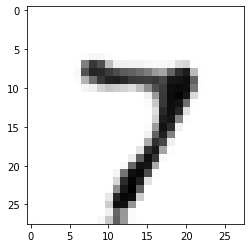

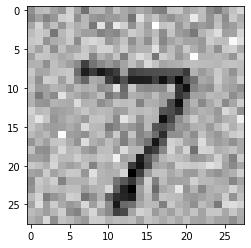

In [24]:
Y_test_pred = model.predict(Xnoise_test.reshape(-1, 28, 28, 1))
plt.imshow(Y_test_pred[0].reshape(28, 28), cmap="gray_r")   #sieht wie orginal aus
plt.show()
plt.imshow(Xnoise_test[0].reshape(28, 28), cmap="gray_r")
plt.show()